In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import functools

# hospedajes 

In [3]:
maestro_cm14 = "../../../datos/CM14/maestro_cm_4.csv"
geomap_cm14 = "../../../datos/CM14/geomap_cm_4.csv"
maestro_cm14_dt = pd.read_csv(maestro_cm14)
geomap_cm14_dt = pd.read_csv(geomap_cm14)

geomap_clean = geomap_cm14_dt.rename(columns = {'dimension_': 'dimension', 'residencia_': 'residencia', 'codigo_pais_': 'codigo_pais'}, inplace = False)

combined_cm14_dt = pd.concat([maestro_cm14_dt, geomap_clean])
combined_cm14_dt

,indicador,dimension,residencia,codigo_pais,anyo,mes,valor,valorPrev,total,fecha,ultima_fecha
0,Viajeros,Regiones,Total,NaN,2021,3,1735172.0,2656776.0,1735172.0,20210331,20210331
1,Viajeros,Regiones,Total,NaN,2021,2,1152795.0,6456402.0,1152795.0,20210228,20210331
2,Viajeros,Regiones,Total,NaN,2021,1,1092017.0,5577618.0,1092017.0,20210131,20210331
3,Viajeros,Regiones,Total,NaN,2020,12,1397664.0,6240788.0,1397664.0,20201231,20210331
4,Viajeros,Regiones,Total,NaN,2020,11,1171282.0,6693210.0,1171282.0,20201130,20210331
...,...,...,...,...,...,...,...,...,...,...,...
7247,Pernoctaciones,Regiones,Resto del mundo,NaN,2011,8,533082.0,NaN,41694917.0,20110831,20210331
7248,Pernoctaciones,Regiones,Resto del mundo,NaN,2011,7,621133.0,NaN,37980214.0,20110731,20210331
7249,Pernoctaciones,Regiones,Resto del mundo,NaN,2011,6,498797.0,NaN,30704218.0,20110630,20210331
7250,Pernoctaciones,Regiones,Resto del mundo,NaN,2011,5,461021.0,NaN,24670723.0,20110531,20210331


In [4]:
combined_cm14_filtered = combined_cm14_dt.drop_duplicates()
combined_cm14_filtered

,indicador,dimension,residencia,codigo_pais,anyo,mes,valor,valorPrev,total,fecha,ultima_fecha
0,Viajeros,Regiones,Total,NaN,2021,3,1735172.0,2656776.0,1735172.0,20210331,20210331
1,Viajeros,Regiones,Total,NaN,2021,2,1152795.0,6456402.0,1152795.0,20210228,20210331
2,Viajeros,Regiones,Total,NaN,2021,1,1092017.0,5577618.0,1092017.0,20210131,20210331
3,Viajeros,Regiones,Total,NaN,2020,12,1397664.0,6240788.0,1397664.0,20201231,20210331
4,Viajeros,Regiones,Total,NaN,2020,11,1171282.0,6693210.0,1171282.0,20201130,20210331
...,...,...,...,...,...,...,...,...,...,...,...
7247,Pernoctaciones,Regiones,Resto del mundo,NaN,2011,8,533082.0,NaN,41694917.0,20110831,20210331
7248,Pernoctaciones,Regiones,Resto del mundo,NaN,2011,7,621133.0,NaN,37980214.0,20110731,20210331
7249,Pernoctaciones,Regiones,Resto del mundo,NaN,2011,6,498797.0,NaN,30704218.0,20110630,20210331
7250,Pernoctaciones,Regiones,Resto del mundo,NaN,2011,5,461021.0,NaN,24670723.0,20110531,20210331


In [5]:
combined_cm14_filtered['fecha'] = pd.to_datetime(combined_cm14_filtered['fecha'], format='%Y%m%d')
combined_cm14_filtered['ultima_fecha'] = pd.to_datetime(combined_cm14_filtered['ultima_fecha'], format='%Y%m%d')

combined_cm14_filtered.head(10)

/tmp/ipykernel_79786/514291458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_cm14_filtered['fecha'] = pd.to_datetime(combined_cm14_filtered['fecha'], format='%Y%m%d')
/tmp/ipykernel_79786/514291458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_cm14_filtered['ultima_fecha'] = pd.to_datetime(combined_cm14_filtered['ultima_fecha'], format='%Y%m%d')


,indicador,dimension,residencia,codigo_pais,anyo,mes,valor,valorPrev,total,fecha,ultima_fecha
0,Viajeros,Regiones,Total,NaN,2021,3,1735172.0,2656776.0,1735172.0,2021-03-31,2021-03-31
1,Viajeros,Regiones,Total,NaN,2021,2,1152795.0,6456402.0,1152795.0,2021-02-28,2021-03-31
2,Viajeros,Regiones,Total,NaN,2021,1,1092017.0,5577618.0,1092017.0,2021-01-31,2021-03-31
3,Viajeros,Regiones,Total,NaN,2020,12,1397664.0,6240788.0,1397664.0,2020-12-31,2021-03-31
4,Viajeros,Regiones,Total,NaN,2020,11,1171282.0,6693210.0,1171282.0,2020-11-30,2021-03-31
5,Viajeros,Regiones,Total,NaN,2020,10,2393707.0,9772631.0,2393707.0,2020-10-31,2021-03-31
6,Viajeros,Regiones,Total,NaN,2020,9,3470747.0,11038778.0,3470747.0,2020-09-30,2021-03-31
7,Viajeros,Regiones,Total,NaN,2020,8,5892395.0,13028096.0,5892395.0,2020-08-31,2021-03-31
8,Viajeros,Regiones,Total,NaN,2020,7,4330564.0,12124664.0,4330564.0,2020-07-31,2021-03-31
9,Viajeros,Regiones,Total,NaN,2020,6,920778.0,11371775.0,920778.0,2020-06-30,2021-03-31


In [6]:
combined_cm14_filtered['codigo_pais'] = combined_cm14_filtered['codigo_pais'].fillna('NON-ID')
combined_cm14_filtered

/tmp/ipykernel_79786/151301792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_cm14_filtered['codigo_pais'] = combined_cm14_filtered['codigo_pais'].fillna('NON-ID')


,indicador,dimension,residencia,codigo_pais,anyo,mes,valor,valorPrev,total,fecha,ultima_fecha
0,Viajeros,Regiones,Total,NON-ID,2021,3,1735172.0,2656776.0,1735172.0,2021-03-31,2021-03-31
1,Viajeros,Regiones,Total,NON-ID,2021,2,1152795.0,6456402.0,1152795.0,2021-02-28,2021-03-31
2,Viajeros,Regiones,Total,NON-ID,2021,1,1092017.0,5577618.0,1092017.0,2021-01-31,2021-03-31
3,Viajeros,Regiones,Total,NON-ID,2020,12,1397664.0,6240788.0,1397664.0,2020-12-31,2021-03-31
4,Viajeros,Regiones,Total,NON-ID,2020,11,1171282.0,6693210.0,1171282.0,2020-11-30,2021-03-31
...,...,...,...,...,...,...,...,...,...,...,...
7247,Pernoctaciones,Regiones,Resto del mundo,NON-ID,2011,8,533082.0,NaN,41694917.0,2011-08-31,2021-03-31
7248,Pernoctaciones,Regiones,Resto del mundo,NON-ID,2011,7,621133.0,NaN,37980214.0,2011-07-31,2021-03-31
7249,Pernoctaciones,Regiones,Resto del mundo,NON-ID,2011,6,498797.0,NaN,30704218.0,2011-06-30,2021-03-31
7250,Pernoctaciones,Regiones,Resto del mundo,NON-ID,2011,5,461021.0,NaN,24670723.0,2011-05-31,2021-03-31


In [7]:
combined_cm14_filtered.groupby('indicador', as_index=False)['total'].mean()

,indicador,total
0,Pernoctaciones,2.383853e+07
1,Viajeros,7.275235e+06


In [8]:
combined_cm14_filtered.groupby('codigo_pais', as_index=False)['total'].mean()

,codigo_pais,total
0,AT,1.559019e+07
1,BE,1.559019e+07
2,CH,1.559019e+07
3,CZ,1.559019e+07
4,DE,1.559019e+07
5,DK,1.559019e+07
6,ES,1.559019e+07
7,FI,1.559019e+07
8,FR,1.559019e+07
9,GB,1.559019e+07


In [9]:
combined_cm14_filtered.groupby('residencia', as_index=False)['total'].sum()

,residencia,total
0,Alemania,3.741645e+09
1,Austria,3.741645e+09
2,Bélgica,3.741645e+09
3,Dinamarca,3.741645e+09
4,Estados Unidos,3.741645e+09
5,Finlandia,3.741645e+09
6,Francia,3.741645e+09
7,Grecia,3.741645e+09
8,Irlanda,3.741645e+09
9,Italia,3.741645e+09


In [10]:
combined_cm14_filtered.groupby('codigo_pais', as_index=False)['total'].mean()

,codigo_pais,total
0,AT,1.559019e+07
1,BE,1.559019e+07
2,CH,1.559019e+07
3,CZ,1.559019e+07
4,DE,1.559019e+07
5,DK,1.559019e+07
6,ES,1.559019e+07
7,FI,1.559019e+07
8,FR,1.559019e+07
9,GB,1.559019e+07


In [11]:
combined_cm14_filtered.groupby(['anyo','mes'], as_index=False)['total'].mean()

,anyo,mes,total
0,2011,4,15020949.0
1,2011,5,16233975.0
2,2011,6,19757088.0
3,2011,7,24015821.5
4,2011,8,26151605.0
...,...,...,...
115,2020,11,2008825.5
116,2020,12,2294689.5
117,2021,1,1742728.5
118,2021,2,1768767.5


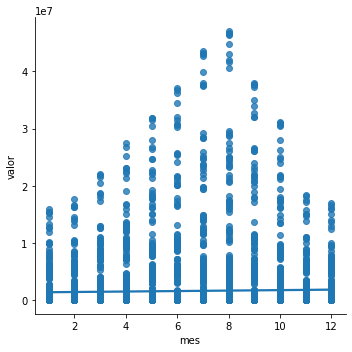

In [15]:
combined_cm14_filtered
sns.lmplot(x="mes", y="valor", data=combined_cm14_filtered)

